<a href="https://colab.research.google.com/github/sener7106/TiL/blob/main/ML%2B20220119_XGBoopst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGboost(Extreme Gradient Boost)

- Ensenbles : 여러개의 분류기를 생성하여 예측하고 예측을 결합해서 정확한 예측을 도출
- 정형 데이터 분류에 뛰어난 성능

- Bagging : 같은 유형의 알고리즘들이 데이터를 다르게 가져가면서 학습을 수행
- 대표적인 알고리즘 : RandomForest

- 병렬처리를 사용하기 때문에 학습과 분류기가 빠름
- 평가 함수를 포함해 다양한 커스텀 최적화 옵션 제공
- 탐욕 알고리즘으로 자동으로 가지치기가 가능. 과적합이 잘 일어나지 않음
- 다른 알고리즘과 연계 활용성이 좋다.


- what is boosting? 어떤 모델이 유효한지나 적절한 지에 대해 약한 분류기 여럿을 조합해 완성해 나가는 과정

## 예측 값과 실제 값의 오차 구하기
- 예측 값과 실체 값의 오차..(loss, cost, residual function)

- 이 비용함수를 반복적으로 데이터셋의 feature를 이용해서 예측

1. 오차 예측 트리 생성
- 지니계수를 사용하여 트리 순서를 생성하고,오차를 예측함.
2. 기존 예측 결과와 잔차를 이용하여 새로운 예측 결과를 만듦
3. 새로운 예측결과로 새롭게 tree를 만들어서 재학습
- 궁극적으로 오차를 0으로 만드는 것이 목표

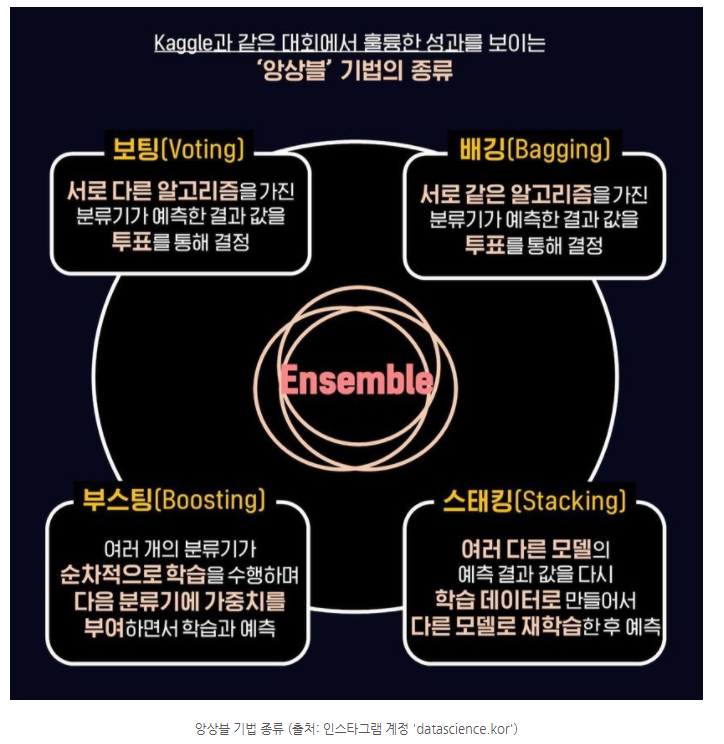

```Predicted Weight = Previous pred + (learning rate * residual) = new pred```

In [1]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load_breast_cancer()

dataset = load_breast_cancer()
dataset

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [4]:
X_features = dataset.data
X_features

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
# target 데이터 : 위스콘신 유방암 0: 악성  1: 양성
y_label = dataset.target
feature_names = dataset.feature_names

In [6]:
cancer_df = pd.DataFrame(data = X_features)
cancer_df.columns = feature_names

In [7]:
cancer_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
cancer_df['target'] = y_label

In [9]:
# 결측치 제거

cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [10]:
cancer_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [11]:
# train_test_split을 이용한 데이터 셋 분류
# random_state = 156

X_train, X_test, y_train , y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state= 156)

In [12]:
X_train.shape

(455, 30)

In [14]:
from xgboost import XGBClassifier

# n_estimators = 10

xgboost = XGBClassifier(n_estimators= 10)
xgboost

XGBClassifier(n_estimators=10)

In [16]:
xgboost.fit(X_train, # XGBoost의 Decision Tree 의 독립변수 feature
            y_train, # XGBoost의 종속변수
            eval_set = [(X_test, y_test)], # cost를 계산하기 위해서 필요한 테스트 데이터 
            eval_metric = 'error') # cost 출력

[0]	validation_0-error:0.052632
[1]	validation_0-error:0.061404
[2]	validation_0-error:0.052632
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.052632
[5]	validation_0-error:0.052632
[6]	validation_0-error:0.052632
[7]	validation_0-error:0.052632
[8]	validation_0-error:0.052632
[9]	validation_0-error:0.052632


XGBClassifier(n_estimators=10)

In [22]:
# xgboost.predict(X_test) X_test 데이터를 이용한 예측 시행
pred = xgboost.predict(X_test)
pred.shape

(114,)

In [24]:
count = 0
for i in range(0, len(pred)) :
  if pred[i] == y_test[i] :
    count += 1
count

avg_rate = (108 / 114) * 100

print(avg_rate)

94.73684210526315


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

In [26]:
# 실제 데이터와 예측데이터간 confusion _matrix
confusion_matrix(y_test, pred)

array([[34,  3],
       [ 3, 74]])

In [31]:
print("accuracy : ", accuracy_score(y_test, pred))
print("precision : ", precision_score(y_test, pred))
print("recall : ", recall_score(y_test, pred))
print("f1-score : ", f1_score(y_test, pred))
print("roc_auc_score : ", roc_auc_score(y_test, pred))

accuracy :  0.9473684210526315
precision :  0.961038961038961
recall :  0.961038961038961
f1-score :  0.961038961038961
roc_auc_score :  0.93997893997894


## Grid_search를 이용한 best hyperparameter 찾기

In [32]:
xgb_clf = XGBClassifier(n_estimators = 100)

In [33]:
#XGBoost의 parameter list
params = { 'max_depth' : [5,7,9],
          'min_child_weight' : [1, 3, 5,7],
          'colsample_bytree' : [0.1,0.3, 0.5, 0.75, 1.0],
          'learning_rate' : [0.0001, 0.001, 0.01, 0.1 , 0.2 , 0.3],
          }

\

In [40]:
from sklearn.model_selection import GridSearchCV

In [43]:
grid_cv = GridSearchCV(xgb_clf, param_grid=params)
grid_cv

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'colsample_bytree': [0.1, 0.3, 0.5, 0.75, 1.0],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                         'max_depth': [5, 7, 9],
                         'min_child_weight': [1, 3, 5, 7]})

In [ ]:
grid_cv.fit(X_train, y_train, eval_set = [(X_test, y_test)],
            eval_metric = 'error')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[3]	validation_0-error:0.061404
[4]	validation_0-error:0.061404
[5]	validation_0-error:0.04386
[6]	validation_0-error:0.04386
[7]	validation_0-error:0.04386
[8]	validation_0-error:0.04386
[9]	validation_0-error:0.04386
[10]	validation_0-error:0.04386
[11]	validation_0-error:0.04386
[12]	validation_0-error:0.04386
[13]	validation_0-error:0.052632
[14]	validation_0-error:0.04386
[15]	validation_0-error:0.04386
[16]	validation_0-error:0.04386
[17]	validation_0-error:0.035088
[18]	validation_0-error:0.035088
[19]	validation_0-error:0.035088
[20]	validation_0-error:0.052632
[21]	validation_0-error:0.04386
[22]	validation_0-error:0.04386
[23]	validation_0-error:0.052632
[24]	validation_0-error:0.04386
[25]	validation_0-error:0.04386
[26]	validation_0-error:0.04386
[27]	validation_0-error:0.04386
[28]	validation_0-error:0.04386
[29]	validation_0-error:0.04386
[30]	validation_0-error:0.04386
[31]	validation_0-error:0.04386
[32]	validation_0-error:0.04386
[33

In [45]:
print('GridSearchCV : 최적 파라미터 :', grid_cv.best_params_)

GridSearchCV : 최적 파라미터 : {'colsample_bytree': 0.3, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 3}


In [47]:
pred = grid_cv.predict(X_test)
pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1])

In [48]:
print(confusion_matrix(y_test,pred))
print("accuracy : ", accuracy_score(y_test, pred))
print("precision : ", precision_score(y_test, pred))
print("recall : ", recall_score(y_test, pred))
print("f1-score : ", f1_score(y_test, pred))
print("roc_auc_score : ", roc_auc_score(y_test, pred))

[[35  2]
 [ 2 75]]
accuracy :  0.9649122807017544
precision :  0.974025974025974
recall :  0.974025974025974
f1-score :  0.974025974025974
roc_auc_score :  0.9599859599859599


In [50]:
# grid_cv에 설정된 모든 경우의 수에 대하여 최소의 cost를 갖는 XGboost 객체를 리턴
grid_cv.best_estimator_

XGBClassifier(colsample_bytree=0.3, learning_rate=0.3, max_depth=5,
              min_child_weight=3)

In [52]:
# feature_improtances_ : 각 객체의 중요도를 리턴
ftr_importances_values = grid_cv.best_estimator_.feature_importances_ 
ftr_importances_values

array([0.01593565, 0.00797898, 0.13413973, 0.12175673, 0.00340838,
       0.00706604, 0.23285769, 0.01612488, 0.00080992, 0.00477253,
       0.02186278, 0.        , 0.        , 0.00647093, 0.00105692,
       0.01031808, 0.01682876, 0.00153248, 0.00264514, 0.00268716,
       0.06004814, 0.02488637, 0.08183934, 0.00767304, 0.01175134,
       0.02961158, 0.02977488, 0.03010482, 0.00743533, 0.10862257],
      dtype=float32)

In [54]:
ftr_importances_values = pd.Series(ftr_importances_values, index = feature_names).sort_values(ascending=False)

In [55]:
ftr_importances_values

mean concavity             0.232858
mean perimeter             0.134140
mean area                  0.121757
worst fractal dimension    0.108623
worst perimeter            0.081839
worst radius               0.060048
worst concave points       0.030105
worst concavity            0.029775
worst compactness          0.029612
worst texture              0.024886
radius error               0.021863
concavity error            0.016829
mean concave points        0.016125
mean radius                0.015936
worst smoothness           0.011751
compactness error          0.010318
mean texture               0.007979
worst area                 0.007673
worst symmetry             0.007435
mean compactness           0.007066
area error                 0.006471
mean fractal dimension     0.004773
mean smoothness            0.003408
fractal dimension error    0.002687
symmetry error             0.002645
concave points error       0.001532
smoothness error           0.001057
mean symmetry              0

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

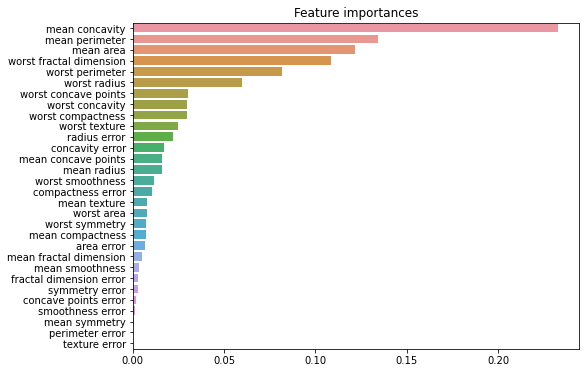

In [57]:
# xgb_clf 100개의 DecisionTree가 있음
# 100개의 DecisionTree 에서 해당 컬럼을 얼마나 사용했는지 비율을 그래프로 그림
# 많이 사용한 컬럼은 Gini 계수가 낮아서 데이터가 잘 분리 되는 컬럼임.
plt.figure(figsize = (8, 6))
plt.title('Feature importances')
sns.barplot(x = ftr_importances_values, y = ftr_importances_values.index)
plt.show()